# RNN-Social Dilemma Tweet Sentiment Analysis

The Social Dilemma, a documentary-drama hybrid explores the dangerous human impact of social networking, with tech experts sounding the alarm on their own creations as the tech experts sound the alarm on the dangerous human impact of social networking. This dataset brings you the twitter responses made with the #TheSocialDilemma hashtag after watching the eye-opening documentary "The Social Dilemma" released in an OTT platform(Netflix) on September 9th, 2020. You can categorize the tweets into different groups to identify the sentiment of the users regarding the documentary.

Requirment:To train a model to categorize the tweets into three categories i.e Positive,Neutral,Negative

## Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import re #remove stop words

from tensorflow.keras.preprocessing.text import Tokenizer  #for tokenization
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score  #metrics
import seaborn as sns

plt.style.use('ggplot') #template/style for background for plots as ggplot

## Reading Data

In [2]:
df_data=pd.read_csv(r"C:\Users\sm983\Desktop\DL And AI\RNN_Practice\TheSocialDilemma.csv")
df_data.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,Sentiment
0,Mari Smith,"San Diego, California",Premier Facebook Marketing Expert | Social Med...,2007-09-11 22:22:51,579942,288625,11610,False,2020-09-16 20:55:33,@musicmadmarc @SocialDilemma_ @netflix @Facebo...,NaN,Twitter Web App,False,Neutral
1,Mari Smith,"San Diego, California",Premier Facebook Marketing Expert | Social Med...,2007-09-11 22:22:51,579942,288625,11610,False,2020-09-16 20:53:17,@musicmadmarc @SocialDilemma_ @netflix @Facebo...,NaN,Twitter Web App,False,Neutral
2,Varun Tyagi,"Goa, India",Indian | Tech Solution Artist & Hospitality Ex...,2009-09-06 10:36:01,257,204,475,False,2020-09-16 20:51:57,Go watch “The Social Dilemma” on Netflix!\n\nI...,NaN,Twitter for iPhone,False,Positive
3,Casey Conway,"Sydney, New South Wales",Head of Diversity & Inclusion @RugbyAU | It's ...,2012-12-28 21:45:06,11782,1033,12219,True,2020-09-16 20:51:46,I watched #TheSocialDilemma last night. I’m sc...,['TheSocialDilemma'],Twitter for iPhone,False,Negative
4,Charlotte Paul,Darlington,Instagram Charlottejyates,2012-05-28 20:43:08,278,387,5850,False,2020-09-16 20:51:11,The problem of me being on my phone most the t...,['TheSocialDilemma'],Twitter for iPhone,False,Positive


## Treating Null Values

In [3]:
df_data.isnull().sum()

user_name              1
user_location       4208
user_description    1383
user_created           0
user_followers         0
user_friends           0
user_favourites        0
user_verified          0
date                   0
text                   0
hashtags            4297
source                 0
is_retweet             0
Sentiment              0
dtype: int64

## Checking overview of Data

In [4]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20068 entries, 0 to 20067
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_name         20067 non-null  object
 1   user_location     15860 non-null  object
 2   user_description  18685 non-null  object
 3   user_created      20068 non-null  object
 4   user_followers    20068 non-null  int64 
 5   user_friends      20068 non-null  int64 
 6   user_favourites   20068 non-null  int64 
 7   user_verified     20068 non-null  bool  
 8   date              20068 non-null  object
 9   text              20068 non-null  object
 10  hashtags          15771 non-null  object
 11  source            20068 non-null  object
 12  is_retweet        20068 non-null  bool  
 13  Sentiment         20068 non-null  object
dtypes: bool(2), int64(3), object(9)
memory usage: 1.9+ MB


## Data Preprocessing

In [5]:
df_data.drop(['user_name','user_location','user_description','user_created','user_followers','user_friends','user_favourites','user_verified','date','hashtags','source','is_retweet'],axis=1,inplace=True)

In [6]:
df_data.head()

,text,Sentiment
0,@musicmadmarc @SocialDilemma_ @netflix @Facebo...,Neutral
1,@musicmadmarc @SocialDilemma_ @netflix @Facebo...,Neutral
2,Go watch “The Social Dilemma” on Netflix!\n\nI...,Positive
3,I watched #TheSocialDilemma last night. I’m sc...,Negative
4,The problem of me being on my phone most the t...,Positive


In [7]:
sentiment_mapping = {'Positive': 1, 'Negative': 0, 'Neutral': 2}
df_data['Sentiment'] = df_data['Sentiment'].map(sentiment_mapping)

In [8]:
df_data.head()

,text,Sentiment
0,@musicmadmarc @SocialDilemma_ @netflix @Facebo...,2
1,@musicmadmarc @SocialDilemma_ @netflix @Facebo...,2
2,Go watch “The Social Dilemma” on Netflix!\n\nI...,1
3,I watched #TheSocialDilemma last night. I’m sc...,0
4,The problem of me being on my phone most the t...,1


In [9]:
df_data.isnull().sum()

text         0
Sentiment    0
dtype: int64

In [10]:
features=df_data['text']
targets=df_data['Sentiment']
X_train,X_test,y_train,y_test=train_test_split(features,targets,test_size=0.20,random_state=9)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)
print('Length of text: {} characters'.format(X_train.str.len().max()))  # Calculate length of string using str.len()
print("Max tweet length:", X_train.str.len().max())
print("Min tweet length:", X_train.str.len().min())
print("Average tweet length:", X_train.str.len().mean())

(16054,) (4014,) (16054,) (4014,)
Length of text: 152 characters
Max tweet length: 152
Min tweet length: 22
Average tweet length: 113.95907561978323


## Normalization of Data using Regular Expressions

In [11]:
import re
def normalize(data):
    normalized = []
    for i in data:
        i = i.lower()       # converting all words to lower case
        i = re.sub('\[.*?\]', '', i)   # removing square brackets and their contents
        i = re.sub('https?://\S+|www\.\S+', '', i)   # removing URLs
        i = re.sub('\n', '', i)     # removing newlines
        i = " ".join(filter(lambda x: x[0] != '@', i.split()))  # removing words starting with '@'
        i = re.sub('[^\w\s]', ' ', i)   # non-words and extra spaces
        i = re.sub(' +', ' ', i)    # removing extra spaces
        i = re.sub('^ ', '', i)     # removing leading space
        i = re.sub(' $', '', i)     # removing trailing space
        normalized.append(i)
    return normalized
X_train = normalize(X_train)
X_test = normalize(X_test)

In [12]:
X_train_subset = [row[:10] for row in X_train]
X_train_subset

['just watch',
 'it is more',
 'thesociald',
 'computers ',
 'watching t',
 'its like w',
 'what kind ',
 'if you tak',
 'so during ',
 'i was made',
 'watched th',
 'ourpact ha',
 'while we d',
 'good morni',
 'after 50 y',
 'just watch',
 'netflix s ',
 'truth has ',
 'technology',
 'so i ve ju',
 'it s scary',
 'anyone els',
 'such an ey',
 'watch the ',
 'halo the u',
 'just finis',
 'just watch',
 'thanks for',
 'just the e',
 'let s have',
 'i saw thes',
 'today s nf',
 'a free ran',
 'when u hea',
 'thesociald',
 'there are ',
 'there are ',
 'just finis',
 'apple is m',
 'thesociald',
 'i just sta',
 'thesociald',
 'lot of tal',
 'the dilemm',
 'thank good',
 'we don t s',
 'finally st',
 'if you re ',
 'we re just',
 'just watch',
 'we have go',
 'y all shou',
 'watch thes',
 'i just sta',
 'thesociald',
 'after watc',
 'thesociald',
 'this one t',
 'more to th',
 'make sure ',
 'many of us',
 'scary a mu',
 'watch thes',
 '_on my swi',
 'ppl are 6x',
 'social med',
 'thesocia

In [13]:
X_test_subset = [row[:10] for row in X_train]
X_test_subset

['just watch',
 'it is more',
 'thesociald',
 'computers ',
 'watching t',
 'its like w',
 'what kind ',
 'if you tak',
 'so during ',
 'i was made',
 'watched th',
 'ourpact ha',
 'while we d',
 'good morni',
 'after 50 y',
 'just watch',
 'netflix s ',
 'truth has ',
 'technology',
 'so i ve ju',
 'it s scary',
 'anyone els',
 'such an ey',
 'watch the ',
 'halo the u',
 'just finis',
 'just watch',
 'thanks for',
 'just the e',
 'let s have',
 'i saw thes',
 'today s nf',
 'a free ran',
 'when u hea',
 'thesociald',
 'there are ',
 'there are ',
 'just finis',
 'apple is m',
 'thesociald',
 'i just sta',
 'thesociald',
 'lot of tal',
 'the dilemm',
 'thank good',
 'we don t s',
 'finally st',
 'if you re ',
 'we re just',
 'just watch',
 'we have go',
 'y all shou',
 'watch thes',
 'i just sta',
 'thesociald',
 'after watc',
 'thesociald',
 'this one t',
 'more to th',
 'make sure ',
 'many of us',
 'scary a mu',
 'watch thes',
 '_on my swi',
 'ppl are 6x',
 'social med',
 'thesocia

# Building Support Vector Machine

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [29]:
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [30]:
svm_classifier = SVC(kernel='linear', random_state=9)

In [31]:
svm_classifier.fit(X_train_tfidf, y_train)

SVC(kernel='linear', random_state=9)

In [32]:
y_pred = svm_classifier.predict(X_test_tfidf)

### Evaluation Metrics for SVM

In [33]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8971101145989039


In [34]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[ 531  100   91]
 [  63 1752  113]
 [  15   31 1318]]


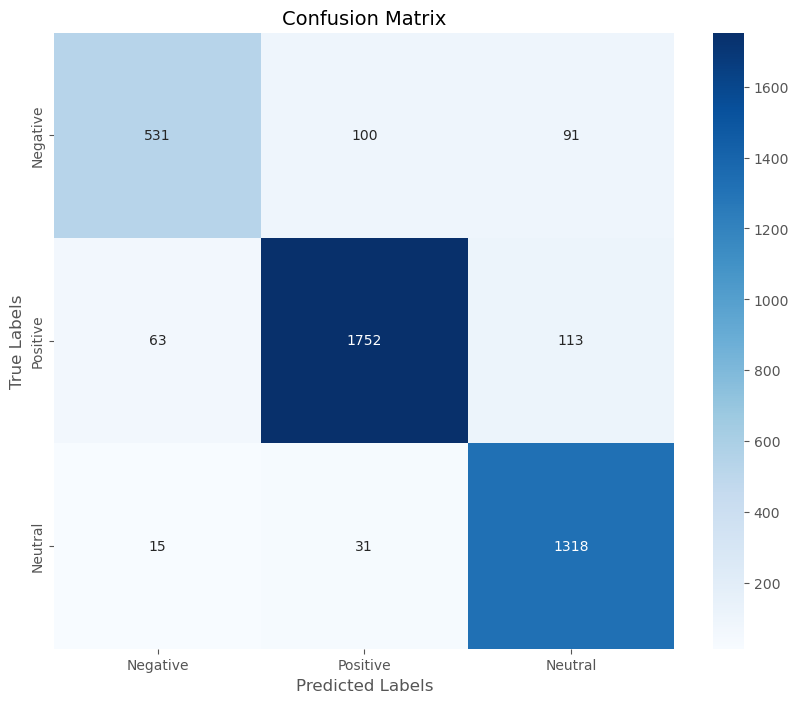

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
conf_matrix = confusion_matrix(y_test, y_pred)
class_labels = ['Negative', 'Positive', 'Neutral']  
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels', size=12)
plt.ylabel('True Labels', size=12)
plt.title('Confusion Matrix', size=14)
plt.show()

# Building RNN Model

# Tokenization

In [44]:
max_words = 10000
tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')  #to consider words out of vocalbulary and process tokenization without interrupting
tokenizer.fit_on_texts(X_train)
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)
maxlen = 140

In [45]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
X_train_padded = pad_sequences(X_train_sequences, maxlen=maxlen, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=maxlen, padding='post', truncating='post')
print("Shape of X_train_padded:", X_train_padded.shape)
print("Shape of X_test_padded:", X_test_padded.shape)

Shape of X_train_padded: (16054, 140)
Shape of X_test_padded: (4014, 140)


In [46]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout, GlobalAveragePooling1D
model = Sequential([
    Embedding(max_words, 64),
    SimpleRNN(64, return_sequences=True),
    SimpleRNN(32, return_sequences=True),
    GlobalAveragePooling1D(),  
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_4 (SimpleRNN)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_5 (SimpleRNN)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d_2           │ ?                           │     0 (unbuilt) │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

## Model Fitting

In [47]:
history = model.fit(X_train_padded, y_train, epochs=15, batch_size=128, validation_split=0.2, verbose=1)

Epoch 1/15
101/101 ━━━━━━━━━━━━━━━━━━━━ 10s 63ms/step - accuracy: 0.4422 - loss: 1.0529 - val_accuracy: 0.4802 - val_loss: 1.0052
Epoch 2/15
101/101 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - accuracy: 0.4839 - loss: 1.0038 - val_accuracy: 0.7076 - val_loss: 0.7591
Epoch 3/15
101/101 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - accuracy: 0.6143 - loss: 0.9553 - val_accuracy: 0.6132 - val_loss: 0.8879
Epoch 4/15
101/101 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.7323 - loss: 0.6889 - val_accuracy: 0.7020 - val_loss: 0.7389
Epoch 5/15
101/101 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.7623 - loss: 0.6043 - val_accuracy: 0.7428 - val_loss: 0.6569
Epoch 6/15
101/101 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.8055 - loss: 0.4907 - val_accuracy: 0.7135 - val_loss: 0.8055
Epoch 7/15
101/101 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.7639 - loss: 0.5941 - val_accuracy: 0.6724 - val_loss: 0.7910
Epoch 8/15
101/101 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - accuracy: 0.7582 - loss: 0.6131 - val_acc

## Visualizing accuracy and loss

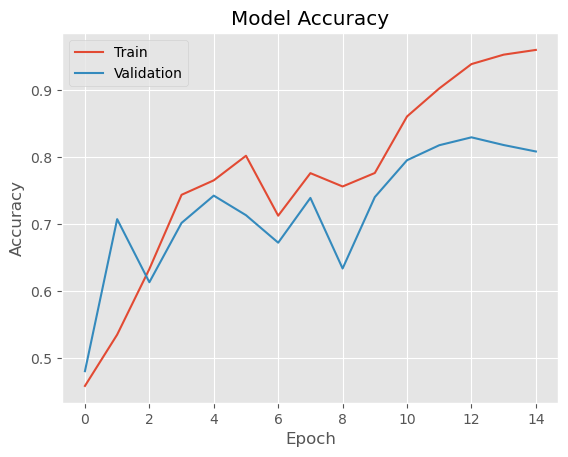

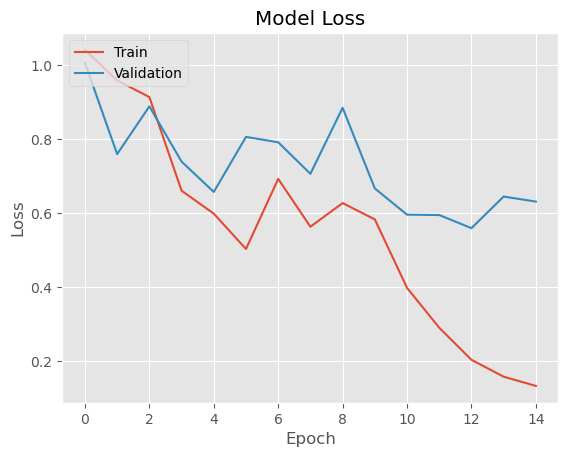

In [48]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Evaluating the model on the test data

In [49]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Evaluating the model on the test data
loss, accuracy = model.evaluate(X_test_padded, y_test)
print('Loss on testing set:', loss)
print('Accuracy on testing set:', accuracy)

126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8025 - loss: 0.6251
Loss on testing set: 0.6248065233230591
Accuracy on testing set: 0.8056800961494446


## Getting predictions on the test data,converting predictions and fetching predictions

In [50]:
# Getting predictions on the test data
pred = model.predict(X_test_padded)
# Converting predictions to class labels
multiclass_prediction = np.argmax(pred, axis=1)
# Print the predictions
print(multiclass_prediction)

126/126 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step
[0 0 0 ... 2 1 2]


# Evaluating with Metrics

## Accuracy,Precision,Recall

In [51]:
# Computing accuracy, precision, and recall
accuracy = accuracy_score(multiclass_prediction, y_test)
precision = precision_score(multiclass_prediction, y_test, average='weighted')
recall = recall_score(multiclass_prediction, y_test, average='weighted')
print('Accuracy on testing set:', accuracy)
print('Precision on testing set:', precision)
print('Recall on testing set:', recall)

Accuracy on testing set: 0.8056801195814649
Precision on testing set: 0.8126960444754614
Recall on testing set: 0.8056801195814649


## Confusion Matrix

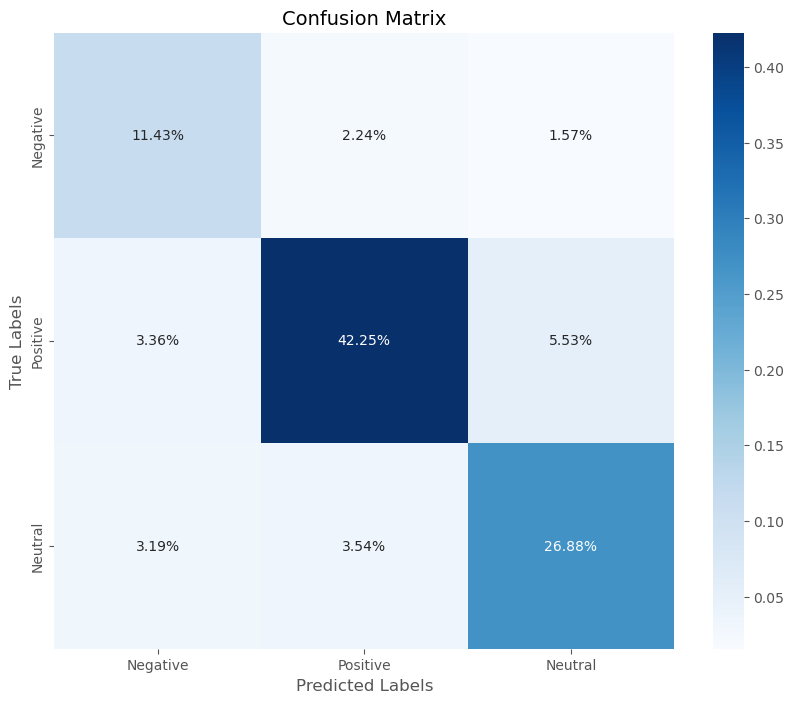

In [52]:
#confusion matrix
matrix = confusion_matrix(multiclass_prediction, y_test, normalize='all')
class_labels = ['Negative', 'Positive', 'Neutral']  
plt.figure(figsize=(10, 8))
sns.heatmap(matrix, annot=True, cmap='Blues', fmt=".2%", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels', size=12)
plt.ylabel('True Labels', size=12)
plt.title('Confusion Matrix', size=14)
plt.show()

# Conclusion:

We have build the model of RNN on data of tweet sentiment analysis of the Netflix series " The Social Dilemma" so the model can predict the tweet sentiment with validation_accuracy of 72% as tested above in Evaluations done Through Metrics